In [ ]:
!pip install traja
# !pip install umap-learn
# !python -m pip istall -U giotto-tda
# !pip install --upgrade dabest
# !pip install hiveplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 5.7 MB/s eta 0:00:00


In [ ]:
import traja
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import matplotlib as mpl
import pathlib
import os
from scipy.spatial.distance import cdist
from scipy.stats import entropy
np.random.seed(42)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['svg.fonttype'] = 'none'
sns.set_context("paper")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir_list= [
                # '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{p65AD}{UAS-TNTE};{GAL4DBD}{+}/light/50/male/',
                # '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{p65AD}{UAS-TNTE};{GAL4DBD}{+}/dark/50/male/',
                # '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{p65AD}{UAS-TNTE};{GAL4DBD}{+}/light/50/female/agarose/',
                # '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{20G06AD}{UAS-TNTE};{VT055404DBD}{+}/light/50/female/agarose/',
                '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{p65AD}{UAS-TNTE};{GAL4DBD}{+}/light/50/male/agarose/',
                # '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{p65AD}{UAS-TNTE};{GAL4DBD}{+}/dark/50/male/agarose/',
                # '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{p65AD}{UAS-TNTE};{GAL4DBD}{+}/light/50/male/100mM-sucrose/',
                # '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{20G06AD}{UAS-TNTE};{VT055404DBD}{+}/light/50/male/agarose/',
                '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{11H10AD}{UAS-TNTE};{VT033947DBD}{+}/light/50/male/agarose/',
                # '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{20G06AD}{UAS-TNTE};{VT055404DBD}{+}/dark/50/male/agarose/',
                # '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{20G06AD}{UAS-TNTE};{VT055404DBD}{+}/light/50/male/100mM-sucrose/',
                # '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{p65AD}{UAS-TNTE};{GAL4DBD}{+}/light/16/male/',
                # '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{p65AD}{UAS-TNTE};{GAL4DBD}{+}/dark/50/male/flybowl/',
                # '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{p65AD}{UAS-TNTE};{GAL4DBD}{+}/light/50/male/flybowl/',
                
                # '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{20G06AD}{UAS-TNTE};{VT055404DBD}{+}/dark/50/male/flybowl/',
                # '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{20G06AD}{UAS-TNTE};{VT055404DBD}{+}/light/50/male/flybowl/',
                # '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{20G06AD}{UAS-TNTE};{VT055404DBD}{+}/light/16/male/',
                # '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{20G06AD}{UAS-TNTE};{VT055404DBD}{+}/light/50/female/',
]
fnames_list = []

for i, dir in enumerate(base_dir_list):
    fnames = sorted(glob.glob(base_dir_list[i]+ '/*.csv', recursive=True))
    fnames_list.append(fnames)
print(len(fnames_list))
fnames_list





2


[['/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{p65AD}{UAS-TNTE};{GAL4DBD}{+}/light/50/male/agarose/01_SCA_test_{p65AD}{UAS-TNTE};{GAL4DBD}{+}_male_50_mated_light_1Agarose-2023-03-17T12_42_49.csv',
  '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{p65AD}{UAS-TNTE};{GAL4DBD}{+}/light/50/male/agarose/02_SCA_test_{p65AD}{UAS-TNTE};{GAL4DBD}{+}_male_50_mated_light_1Agarose-2023-03-20T10_20_06.csv',
  '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{p65AD}{UAS-TNTE};{GAL4DBD}{+}/light/50/male/agarose/03_SCA_test_{p65AD}{UAS-TNTE};{GAL4DBD}{+}_male_50_mated_light_agarose-2023-03-29T12_54_07.csv',
  '/content/drive/My Drive/00_project/05_fly-arena/9_social-clustering-assay/preliminary_test/{p65AD}{UAS-TNTE};{GAL4DBD}{+}/light/50/male/agarose/04_SCA_test_{p65AD}{UAS-TNTE};{GAL4DBD}{+}_male_50_mated_light_agarose-2023-03-30T10_46_42.csv'],
 ['/content/drive/My 

In [ ]:
# ratio =(90/1024)
# data_header = ['time', 'latency', 'bodycount', 'bin1', 'bin2', 'bin3', 'ssi']
# all_df = []
# fly_loc_list = []
# pick_random = True

# nnd_avg_avg =[]
# for j, sub_fnames_list in enumerate(fnames_list):
#     print('group', j+1)
#     find_duplicate = []
#     nnd_avg =[]
#     for i, fname in enumerate(sub_fnames_list):
#         file_name  = os.path.basename(fname)
#         print(i+1, file_name)
#         with open(fname) as f:
#             df = pd.read_csv(f, 
#                              header=None, 
#                              usecols=[2], 
#                             #  names=usecols,
#                             #  error_bad_lines=False, 
#                             #  warn_bad_lines=True, 
#                             )
#             max_col = df.values.max()*2 + 7
#             print(max_col)
#         with open(fname) as f:
#             use_cols = [i for i in range(max_col)]
#             df = pd.read_csv(f, 
#                              header=None, 
#                              usecols=use_cols, 
#                              names=use_cols,
#                              na_values=[''],
#                              error_bad_lines=False, 
#                             #  warn_bad_lines=True, 
#                             )
#             print(df.head())

In [ ]:
ratio =(90/1024)
data_header = ['time', 'latency', 'bodycount', 'bin1', 'bin2', 'bin3', 'ssi']
all_df = []
fly_loc_list = []
pick_random = True

nnd_avg_avg =[]
for j, sub_fnames_list in enumerate(fnames_list):
    print('group', j+1)
    find_duplicate = []
    nnd_avg =[]
    for i, fname in enumerate(sub_fnames_list):
        file_name  = os.path.basename(fname)
        print(i+1, file_name)

        # Read only the first row to determine the number of columns to read
        largest_column_count = 0
        with open(fname) as temp_f:
            lines = temp_f.readlines()
            for l in lines:
                column_count = len(l.split(',')) 
                largest_column_count = column_count if largest_column_count < column_count else largest_column_count
            print(largest_column_count)
        fly_cent = [str(k) for k in range(largest_column_count-7)]
        usecols = data_header + list(fly_cent)
        
        num_fly = (largest_column_count-7) // 2
        if num_fly > 50:
            num_fly = 50
        elif num_fly < 50:
            num_fly = (largest_column_count-7) // 2
        else:
            num_fly = 50

        with open(fname) as f:
            df = pd.read_csv(f, 
                             header=None, 
                            #  usecols=usecols, 
                             names=usecols,
                             error_bad_lines=False, 
                             warn_bad_lines=True, 
                            )
            
        df['time'] = df['latency'].cumsum()
        df['time'] = df['time'] - df['time'].iat[0]
        df['time'] = df['time']//60 
        df = df.iloc[:, :107]
        # df.dropna(inplace=True)        
        print(num_fly)
        # print(df.head())
        

        grouped_df = df.groupby('time', as_index=False).first()

        fly_loc = grouped_df.iloc[:, 7:] * ratio
        fly_loc_np = fly_loc.to_numpy().reshape(-1, num_fly, 2)

        # num_bins=5
        # entropy_values = []
        # for i in range(fly_loc_np.shape[0]):
        #     H, xedges, yedges = np.histogram2d(fly_loc_np[i, :, 0], fly_loc_np[i, :, 1], bins=num_bins)
        #     H_norm = H / np.sum(H)
        #     entropy_values.append(entropy(H_norm.flatten(), base=num_bins))

        nnd_ssi_list = []
        rnd_ssi_list = []
        for l in range(fly_loc.shape[0]):
            source_fly = fly_loc_np[l]

            # Compute all pairwise distances between flies
            dist_matrix = np.linalg.norm(source_fly[:, None, :] - source_fly, axis=2)

            # Set diagonal elements to infinity to exclude self-distances
            np.fill_diagonal(dist_matrix, np.inf)

            # Compute nearest neighbor distances
            nnd = np.nanmin(dist_matrix, axis=1)
            nnd_avg.append(nnd.mean())

            # Compute random distances
            rnd_id = np.random.randint(num_fly - 1, size=num_fly)
            rnd = np.array([dist_matrix[k, rnd_id[k]] for k in range(num_fly)])

            # Compute SSI fractions for nearest neighbor and random distances
            bins = 5
            nnd_bins = np.histogram(nnd, bins=[0, bins, bins * 2, np.inf])[0] / num_fly
            rnd_bins = np.histogram(rnd, bins=[0, bins, bins * 2, np.inf])[0] / num_fly
            nnd_ssi = nnd_bins[0] - nnd_bins[1]
            rnd_ssi = rnd_bins[0] - rnd_bins[1]

            nnd_ssi_list.append(nnd_ssi * 100)
            rnd_ssi_list.append(rnd_ssi * 100)

        grouped_df.drop(grouped_df.iloc[:, 7:], inplace=True, axis=1)
        grouped_df['ssi_nnd'] = nnd_ssi_list
        grouped_df['ssi_rnd'] = rnd_ssi_list
        # grouped_df['spatial_entropy'] = entropy_values
        grouped_df['fly'] = i + 1
        grouped_df['group'] = j + 1

        all_df.append(grouped_df)
    nnd_avg_avg.append(np.array(nnd_avg).mean())
all_df = pd.concat(all_df,ignore_index=True)
all_df.tail(5)


group 1
1 01_SCA_test_{p65AD}{UAS-TNTE};{GAL4DBD}{+}_male_50_mated_light_1Agarose-2023-03-17T12_42_49.csv
109


<ipython-input-5-fbb29d0e183a>:36: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,
<ipython-input-5-fbb29d0e183a>:36: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,


50
2 02_SCA_test_{p65AD}{UAS-TNTE};{GAL4DBD}{+}_male_50_mated_light_1Agarose-2023-03-20T10_20_06.csv
109


<ipython-input-5-fbb29d0e183a>:36: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,
<ipython-input-5-fbb29d0e183a>:36: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,


50
3 03_SCA_test_{p65AD}{UAS-TNTE};{GAL4DBD}{+}_male_50_mated_light_agarose-2023-03-29T12_54_07.csv
107


<ipython-input-5-fbb29d0e183a>:36: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,
<ipython-input-5-fbb29d0e183a>:36: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,


50
4 04_SCA_test_{p65AD}{UAS-TNTE};{GAL4DBD}{+}_male_50_mated_light_agarose-2023-03-30T10_46_42.csv
109


<ipython-input-5-fbb29d0e183a>:36: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,
<ipython-input-5-fbb29d0e183a>:36: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,


50
group 2
1 01_SCA_test_{11H10AD}{UAS-TNTE};{VT033947DBD}{+}_male_50_mated_light_agarose-2023-03-29T10_43_33.csv
109


<ipython-input-5-fbb29d0e183a>:36: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,
<ipython-input-5-fbb29d0e183a>:36: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,


50
2 02_SCA_test_{11H10AD}{UAS-TNTE};{VT033947DBD}{+}_male_50_mated_light_agarose-2023-03-31T10_30_09.csv
115


<ipython-input-5-fbb29d0e183a>:36: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,
<ipython-input-5-fbb29d0e183a>:36: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(f,


50


,time,latency,bodycount,bin1,bin2,bin3,ssi,ssi_nnd,ssi_rnd,fly,group
715,115.0,0.054033,49,42,36,20,6,10.0,0.0,2,2
716,116.0,0.024894,47,46,36,14,10,16.0,-10.0,2,2
717,117.0,0.025830,50,38,50,10,-12,-12.0,-6.0,2,2
718,118.0,0.025064,50,58,34,8,24,24.0,0.0,2,2
719,119.0,0.023353,49,63,26,10,37,38.0,0.0,2,2


<ipython-input-6-d5dd899865ec>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(data=all_df,


(-60.0, 100.0)

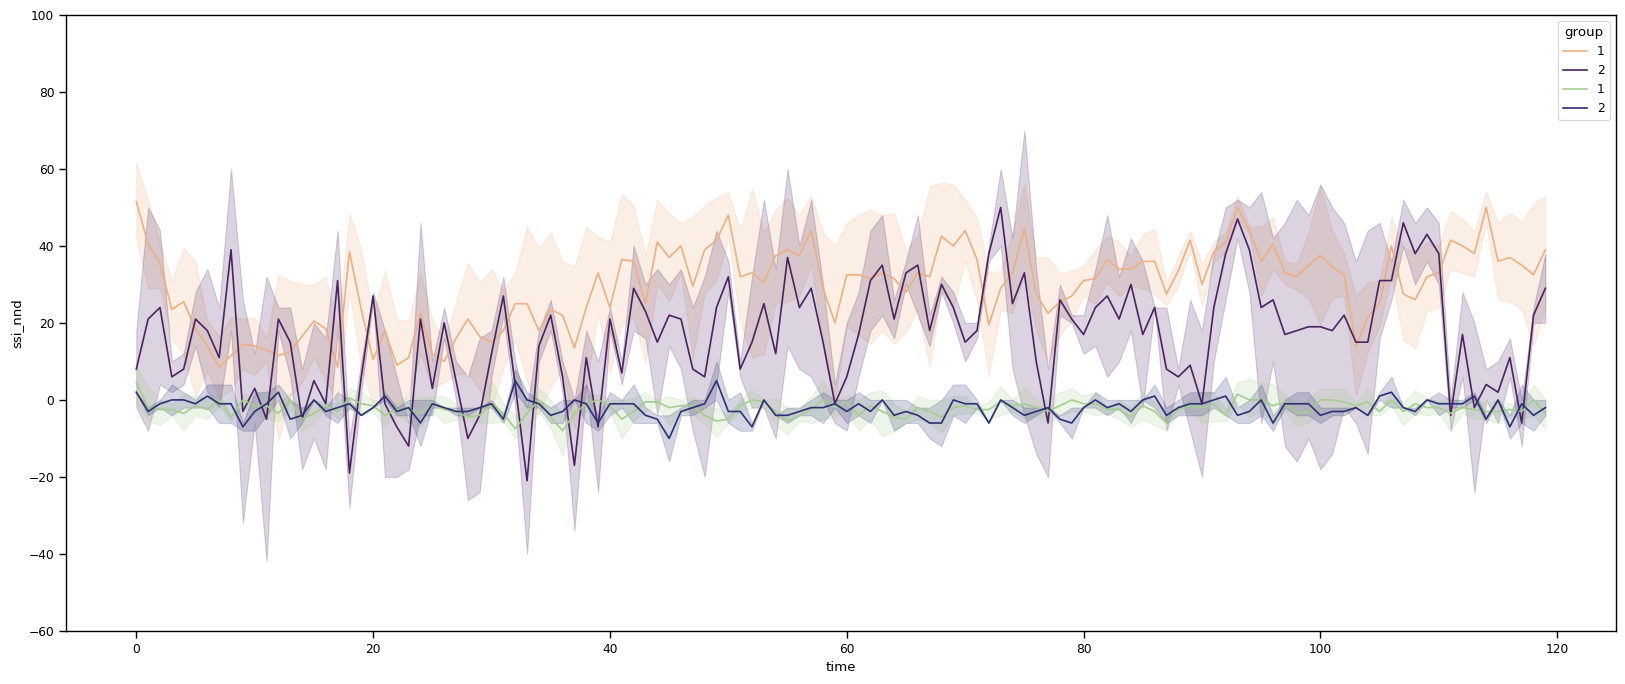

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=all_df, 
             x="time", 
             y="ssi_nnd",
             hue='group', 
             palette='flare',
             ci=68,
            #  estimator=None,
            #  units='fly',
            #  alpha=0.7,
             ax=ax
             )
sns.lineplot(data=all_df, 
             x="time", 
             y="ssi_rnd",
             hue='group', 
             palette='crest',
            #  ci=66,
            #  estimator=None,
            #  units='fly',
            #  alpha=0.7,
             ax=ax
             )
ax.set_ylim(-60, 100)
# ax.set_xlim(0, 89)

In [ ]:
NND_list = []
RND_list = []
for i in range(num_fly):
    source_fly = fly_loc.iloc[:, [i*2, (i*2)+1]]
    dist_list = []
    for j in range(num_fly):
        if i != j:
            target_fly = fly_loc.iloc[:, [j*2, (j*2)+1]]
            dist = np.linalg.norm(source_fly.values - target_fly.values,
                                  axis=1)
            dist_list.append(dist)
    NND = pd.DataFrame(dist_list).min(axis='rows')

    RND_id = np.random.randint(num_fly-1)
    RND = dist_list[RND_id]
    
    NND_list.append(NND)
    RND_list.append(RND)
NND_df = pd.DataFrame(NND_list).T
RND_df = pd.DataFrame(RND_list).T
NND_df = NND_df.unstack().reset_index()
NND_df.columns = ['fly', 'frame', 'distance']
NND_df['method'] = 'NND'
RND_df = RND_df.unstack().reset_index()
RND_df.columns = ['fly', 'frame', 'distance']
RND_df['method'] = 'RND'
dist_df = pd.concat([NND_df, RND_df]).reset_index(drop=True)
dist_df

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from sort import Sort

# Load your data into a pandas DataFrame
df = pd.read_csv('fly_data.csv')

# Create a list of column names for the x,y-coordinate pairs
columns = ['x'+str(i) for i in range(1, 101, 2)] + ['y'+str(i) for i in range(1, 101, 2)]

# Initialize the SORT tracker
tracker = Sort()

# Initialize an empty DataFrame to store the results
labeled_df = pd.DataFrame(columns=['frame', 'fly_id']+columns)

# Iterate over the rows in the DataFrame
for i in range(len(df)):
    # Get the x,y-coordinate pairs for this row
    points = np.zeros((50, 2))
    for j in range(50):
        points[j] = [df.iloc[i][columns[j*2]], df.iloc[i][columns[j*2+1]]]

    # Call the SORT tracker to get the current list of tracked objects
    objects = tracker.update(points)

    # Add the tracked objects to the DataFrame
    for obj in objects:
        fly_id = obj[4] + 1
        labeled_row = pd.DataFrame({'frame': i+1, 'fly_id': fly_id}, index=[i])
        for j in range(50):
            labeled_row['x'+str(j+1)] = df.at[i, 'x'+str(j+1)]
            labeled_row['y'+str(j+1)] = df.at[i, 'y'+str(j+1)]
        labeled_df = pd.concat([labeled_df, labeled_row], axis=0)

# Save the labeled DataFrame to a new CSV file
labeled_df.to_csv('labeled_fly_data.csv', index=False)


         fly   frame   distance method
0          0       0   9.901060    NND
100        0     100   6.095212    NND
200        0     200   9.773720    NND
300        0     300   9.759278    NND
400        0     400   9.991868    NND
...      ...     ...        ...    ...
8113386   38  207600   6.960530    NND
8113486   38  207700  16.991717    NND
8113586   38  207800   7.148804    NND
8113686   38  207900   9.003069    NND
8113786   38  208000   6.355853    NND

[81159 rows x 4 columns]
0 12
10000 7
20000 11
30000 19
40000 12
50000 6
60000 5
70000 -3
80000 7
90000 11
100000 9
110000 9
120000 4
130000 12
140000 9
150000 15
160000 19
170000 13
180000 28
190000 3
200000 14


Here's how the code works:

1. The input data is loaded into a pandas DataFrame.
2. A list of column names for the x,y-coordinate pairs is created.
3. The SORT tracker is initialized.
4. An empty DataFrame is initialized to store the results.
5. The code iterates over the rows in the input DataFrame.
6. The x,y-coordinate pairs for the current frame are extracted and passed to the SORT tracker.
7. The current list of tracked objects is returned by the SORT tracker.
8. The tracked objects are added to the output DataFrame, along with the x,y-coordinate pairs and the frame number.
9. The output DataFrame is saved to a new CSV file.

Note that the sort.py module is not included in the standard Python library, so you will need to obtain it separately. You can find the implementation used here at this GitHub repository: https://github.com/abewley/sort.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


# X = StandardScaler().fit_transform(fly_loc.iloc[:, :-3])
# X
x = fly_loc.iloc[:, :-3]
stack = []
for i in range(num_fly):
    _df = x.iloc[:, i*2:(i*2)+2]
    _df['fly'] = i+1
    stack.append(_df)
pd.concat(stack, axis=0)

<ipython-input-340-9ca2d3075ae4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['fly'] = i+1


In [ ]:
bins_list = []
for i in range(10):
    unit = (i+1)*2 + 1
    bins = []
    # target_df = RND_df
    target_df = NND_df
    for i in range(500):
        i = np.random.randint(10000)
        bins_1 = sum(target_df[target_df.frame==i].distance<unit)
        bins_2 = sum((unit<=target_df[target_df.frame==i].distance) & (target_df[target_df.frame==i].distance<unit*2))
        bins.append(bins_1 - bins_2)
    bins_list.append(np.array(bins).mean())
    print(unit, np.array(bins).mean())



3 -5.85
5 -2.5
7 2.81
9 8.876
11 13.992
13 18.806
15 21.538
17 23.34
19 24.654
21 25.2


<AxesSubplot:xlabel='distance', ylabel='Count'>

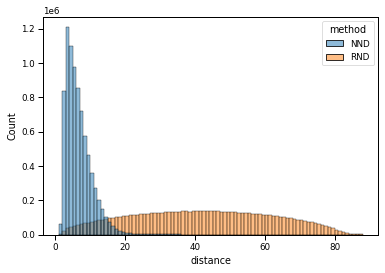

In [ ]:
sns.histplot(data=dist_df, x="distance", binwidth=1, hue='method')

In [ ]:
NND_list = []
for i in new_df.fly.unique():
    source_fly = new_df[new_df.fly==i].copy()
    dist_list = []
    for j in new_df.fly.unique()[:-5]:
        if i != j:
            target_fly = new_df[new_df.fly==j].copy()
            dist = np.linalg.norm(source_fly.values - target_fly.values,
                                  axis=1)
            dist_list.append(dist)


    NND = pd.DataFrame(dist_list).min(axis='rows')
    NND_list.append(NND)
NND_list = pd.DataFrame(dist_list)
NND_list
# source_fly = new_df[new_df.fly==1].copy()
# target_fly = new_df[new_df.fly==2].copy()
# rand_dist = np.linalg.norm(source_fly.values - target_fly.values,
#                            axis=1)
# rand_dist

ValueError: ignored